<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Bioinformatics/blob/master/Baseline_random_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.4.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CuArrays"
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"'
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

Installing Julia 1.4.2 on the current Colab Runtime...
2021-03-07 15:09:59 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.4/julia-1.4.2-linux-x86_64.tar.gz [99093958/99093958] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
    Cloning default registries into `~/.julia`
    Cloning registry from "https://github.com/JuliaRegistries/General.git"
      Added registry `General` to `~/.julia/registries/General`
  Resolving package versions...
  Installed Artifacts ─────── v1.3.0
  Installed VersionParsing ── v1.2.0
  Installed libsodium_jll ─── v1.0.18+1
  Installed MbedTLS_jll ───── v2.16.8+1
  Installed ZeroMQ_jll ────── v4.3.2+6
  Installed Parsers ───────── v1.0.16
  Installed IJulia ────────── v1.23.2
  Installed JLLWrappers ───── v1.2.0
  Installed JSON ──────────── v0.21.1
  Installed SoftGlobalScope ─ v1.1.0
  Installed Conda ─────────── v1.5.1
  Installed MbedTLS ───────── v1.0.3
  Installed ZMQ ───────────── v1.2.1
#####################################

In [1]:
versioninfo()

Julia Version 1.4.2
Commit 44fa15b150* (2020-05-23 18:35 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-8.0.1 (ORCJIT, broadwell)
Environment:
  JULIA_NUM_THREADS = 2


In [2]:
import Pkg
Pkg.add("Plots")
Pkg.add("Random")
Pkg.add("PyPlot")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [9a3f8284] + Random 
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
  Installed PyPlot ─ v2.9.0
  Installed PyCall ─ v1.92.2
   Updating `~/.julia/environments/v1.4/Project.toml`
  [d330b81b] + PyPlot v2.9.0
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [438e738f] + PyCall v1.92.2
  [d330b81b] + PyPlot v2.9.0
   Building PyCall → `~/.julia/packages/PyCall/tqyST/deps/build.log`


In [3]:
n=100 # length of read
l=1e7/n # no. of reads
l=Int64(l) # length of genome: 1e7
x=rand(1:1e7,l);  # Using random the starting positions of reads of length 100 are simulated and stored in an array

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1260


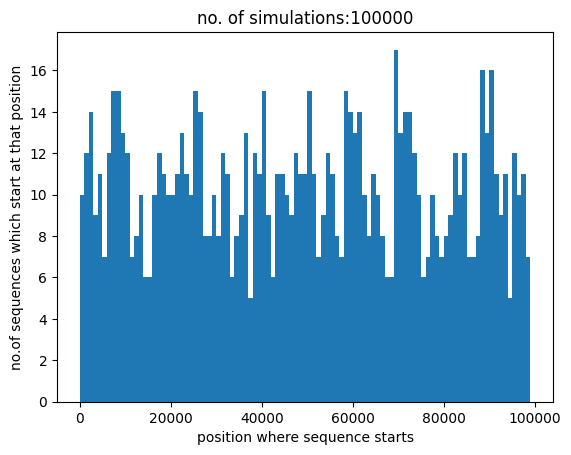

PyObject Text(0.5, 1.0, 'no. of simulations:100000')

In [4]:
using PyPlot 
fig,ax = plt.subplots(1,1)
ax.hist(x,bins=1:1000:1e5)
plt.xlabel("position where sequence starts")
plt.ylabel("no.of sequences which start at that position")
plt.title("no. of simulations:"*string(l))

In [11]:
x=sort(x); # We find the lengths of various zero coverage regions .
x1=[]
for i in 1:l-1
    if x[i+1]-x[i]>=100
        append!(x1,x[i+1]-x[i]-100)
    end
end

In [12]:
x2=[] # We find the lengths of various one coverage regions.
i=2
while (i<l)
    d=0
    if x[i-1]+100<x[i] && x[i]+100<x[i+1]
        append!(x2,100)
    elseif x[i-1]+100>x[i] && x[i]+100<x[i+1]
        append!(x2,x[i-1]+100-x[i])
    elseif x[i-1]+100<x[i] && x[i+1]<x[i]+100
        append!(x2,x[i+1]-x[i])   
    else
        d=x[i+1]-x[i-1]-100
        if d>0
            append!(x2,d)
        end
    end
    i+=1
end

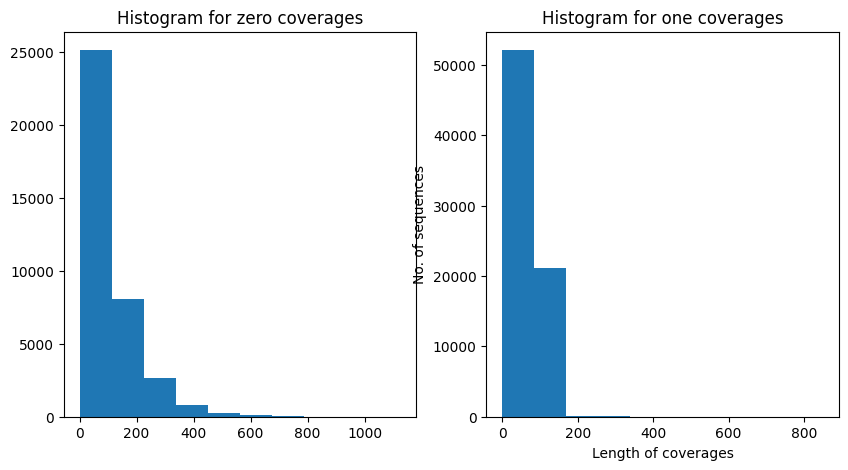

PyObject Text(0.5, 1.0, 'Histogram for one coverages')

In [13]:
fig,(axs1,axs2)=plt.subplots(1,2,figsize=(10,5))
axs1.hist(x1)
axs2.hist(x2)
plt.xlabel("Length of coverages")
plt.ylabel("No. of sequences")
axs1.set_title("Histogram for zero coverages")
axs2.set_title("Histogram for one coverages")

### The algorithm for previous plots seems to be difficult for two coverages and above , so in the next algorithm we simulate the starting position of a read and add 1.0 to next 100 positions as well. so the final array which we obtain we will have no. of coverages above a particular location. The array will look like  [1, 2, 3, 3, 3, 2, 2, 2, 2, 1, 1] , by visual inspection for coverage 1 we have 2 regions of length 1 and 2. For coverage 2 the lengths will be 1 and 4. For coverage 3 the lengths will be 3 alone. The below code just finds the length of these regions and plots are plotted.

In [14]:
l=Int32(1e7)
n=100
s=Int32(4*l/n)
a=zeros(Int32,l)
for i in 1:s
    j=rand(1:l-100)
    a[j]+=1
    a[j+100] -= 1
end
# integrating the derivative array
for pos in 2:l
  a[pos]=a[pos]+a[pos-1]
end

In [99]:
#=
x11=[]
d=0
for i in 1:l
    if a[i]==0
        d+=1
    else
        if d>0
            append!(x11,d)
        d=0
        end
    end
end
x22=[]
d=0
for i in 1:l
    if a[i]==1
        d+=1
    else
        if d>0
            append!(x22,d)
        d=0
        end
    end
end 
x33=[]
d=0 # length of a coverage
for i in 1:l
    if a[i]==2 # checking if coverages has 2 sequences on top of position 
        d+=1
    else
        if d>0 # ensuring the length of a coverage is atleast 1 unit long
            append!(x33,d)
        d=0
        end
    end
end
=#

single function to calculate all lengths for various overlaps

In [44]:
function heights(a)
    length_dist = Dict{Int, Vector{Int}}()
    d=1
    h=a[1]
    for i in 2:l
      if a[i]==h
          d+=1
      else
          if d>0
              push!(get!(length_dist, h, Int[]), d)
          d=1
          h=a[i]
          end
      end
    end
  return length_dist
  end

heights (generic function with 1 method)

In [96]:
heights(a)

Dict{Int64,Array{Int64,1}} with 19 entries:
  18 => [2]
  2  => [21, 4, 1, 3, 29, 25, 16, 12, 47, 33  …  7, 19, 12, 5, 3, 17, 7, 9, 3, …
  16 => [11, 1, 6, 5, 4, 6, 5, 2, 1, 5, 1, 4]
  11 => [13, 6, 13, 1, 15, 3, 5, 4, 1, 16  …  7, 32, 11, 2, 10, 5, 5, 2, 8, 20]
  0  => [3, 125, 74, 1, 5, 35, 1, 14, 16, 16  …  61, 113, 6, 12, 73, 53, 9, 55,…
  7  => [11, 3, 3, 9, 3, 1, 10, 5, 22, 2  …  33, 7, 7, 12, 3, 16, 5, 1, 6, 2]
  9  => [1, 14, 8, 34, 4, 25, 13, 6, 7, 3  …  10, 1, 3, 9, 9, 4, 6, 19, 2, 3]
  10 => [2, 1, 2, 6, 19, 5, 6, 5, 18, 2  …  8, 2, 2, 7, 15, 2, 16, 2, 1, 13]
  17 => [8, 6, 8, 6]
  8  => [5, 1, 17, 12, 19, 3, 17, 15, 10, 15  …  15, 3, 5, 18, 6, 5, 11, 9, 18,…
  6  => [39, 27, 8, 2, 5, 13, 11, 1, 7, 11  …  11, 9, 9, 3, 4, 2, 4, 13, 8, 15]
  4  => [8, 30, 15, 12, 15, 8, 1, 18, 4, 5  …  8, 5, 8, 14, 7, 3, 11, 36, 5, 28]
  3  => [68, 3, 17, 34, 18, 31, 1, 1, 12, 31  …  40, 5, 13, 3, 20, 17, 14, 14, …
  5  => [3, 1, 45, 18, 7, 2, 26, 1, 25, 1  …  4, 5, 17, 2, 7, 3, 49, 46, 2, 9]


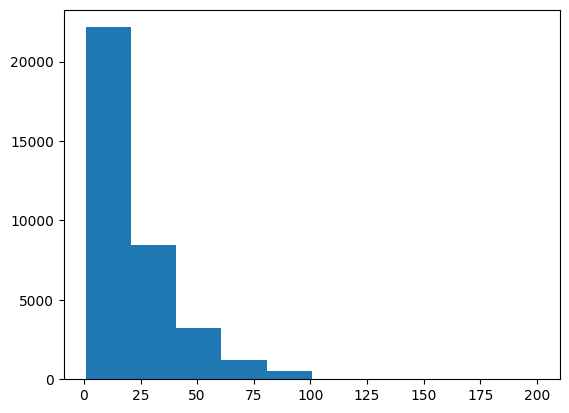

([22162.0, 8452.0, 3221.0, 1218.0, 548.0, 18.0, 8.0, 4.0, 1.0, 1.0], [1.0, 20.9, 40.8, 60.699999999999996, 80.6, 100.5, 120.39999999999999, 140.29999999999998, 160.2, 180.1, 200.0], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x7f223d79b350>, PyObject <matplotlib.patches.Rectangle object at 0x7f223d78e050>, PyObject <matplotlib.patches.Rectangle object at 0x7f223d79ba90>, PyObject <matplotlib.patches.Rectangle object at 0x7f223d79be50>, PyObject <matplotlib.patches.Rectangle object at 0x7f223d79bbd0>, PyObject <matplotlib.patches.Rectangle object at 0x7f223d7a67d0>, PyObject <matplotlib.patches.Rectangle object at 0x7f223d7a6a90>, PyObject <matplotlib.patches.Rectangle object at 0x7f223d7a6e50>, PyObject <matplotlib.patches.Rectangle object at 0x7f223d79bf50>, PyObject <matplotlib.patches.Rectangle object at 0x7f223d79bf90>])

In [49]:
fig,ax = plt.subplots(1,1)
h=ax.hist(heights(a)[1])

In [68]:
Pkg.add("CurveFit")

  Resolving package versions...
  Installed XML2_jll ───── v2.9.10+3
  Installed Mocking ────── v0.7.1
  Installed EzXML ──────── v1.1.0
  Installed Libiconv_jll ─ v1.16.0+7
  Installed CurveFit ───── v0.3.3
  Installed OffsetArrays ─ v1.3.1
  Installed Intervals ──── v1.5.0
  Installed Polynomials ── v1.2.0
  Installed TimeZones ──── v1.5.3
######################################################################### 100.0%
######################################################################### 100.0%
   Updating `~/.julia/environments/v1.4/Project.toml`
  [5a033b19] + CurveFit v0.3.3
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [5a033b19] + CurveFit v0.3.3
  [8f5d6c58] + EzXML v1.1.0
  [d8418881] + Intervals v1.5.0
  [94ce4f54] + Libiconv_jll v1.16.0+7
  [78c3b35d] + Mocking v0.7.1
  [6fe1bfb0] + OffsetArrays v1.3.1
  [f27b6e38] + Polynomials v1.2.0
  [f269a46b] + TimeZones v1.5.3
  [02c8fc9c] + XML2_jll v2.9.10+3
   Building TimeZones → `~/.julia/packages/TimeZones/K98G0/d

In [77]:
using CurveFit

┌ Info: Precompiling CurveFit [5a033b19-8c74-5913-a970-47c3779ef25c]
└ @ Base loading.jl:1260


In [81]:
length(h[2][1:10]),length(h[1])

(10, 10)

In [94]:
fit=curve_fit(ExpFit,h[2][1:10],h[1])
y0b = fit.(h[2][1:10])

10-element Array{Float64,1}:
 29388.549225794162
  8468.652757231122
  2440.3409290994114
   703.2126621501584
   202.63891914102646
    58.392764750693935
    16.826555282092187
     4.848767888798067
     1.397228942305294
     0.4026277936969885

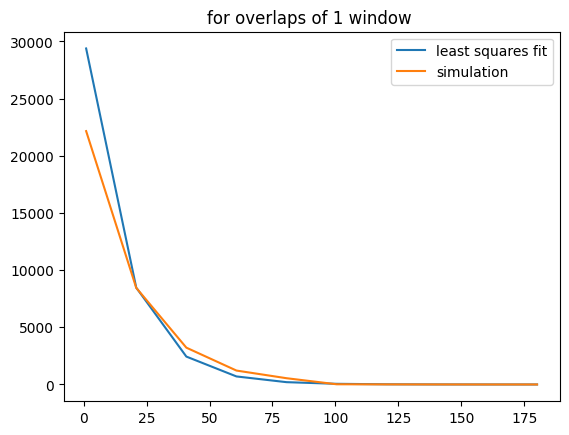

In [97]:
plt.plot(h[2][1:10],y0b,label="least squares fit")
plt.plot(h[2][1:10],h[1],label="simulation")
plt.title("for overlaps of 1 window ")
plt.legend()
plt.show()

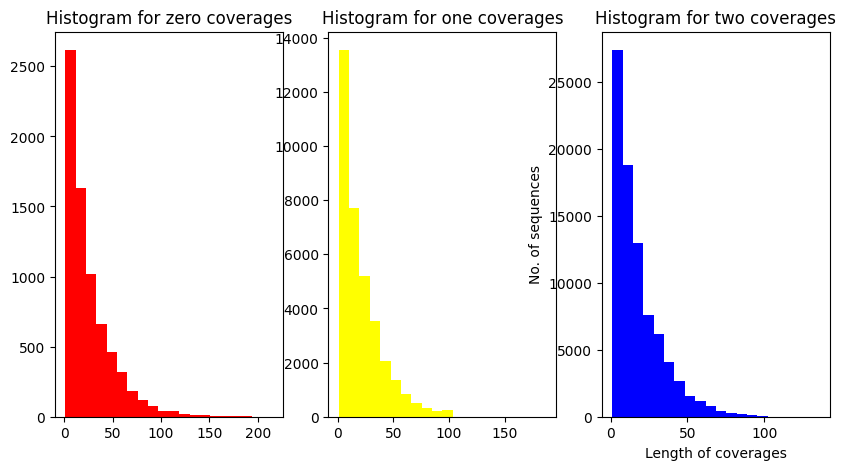

PyObject Text(0.5, 1.0, 'Histogram for two coverages')

In [ ]:
fig,(axs1,axs2,axs3)=plt.subplots(1,3,figsize=(10,5))
axs1.hist(x11,bins=20,color="red")
axs2.hist(x22,bins=20,color="yellow")
axs3.hist(x33,bins=20,color="blue")
plt.xlabel("Length of coverages")
plt.ylabel("No. of sequences")
axs1.set_title("Histogram for zero coverages")
axs2.set_title("Histogram for one coverages")
axs3.set_title("Histogram for two coverages")

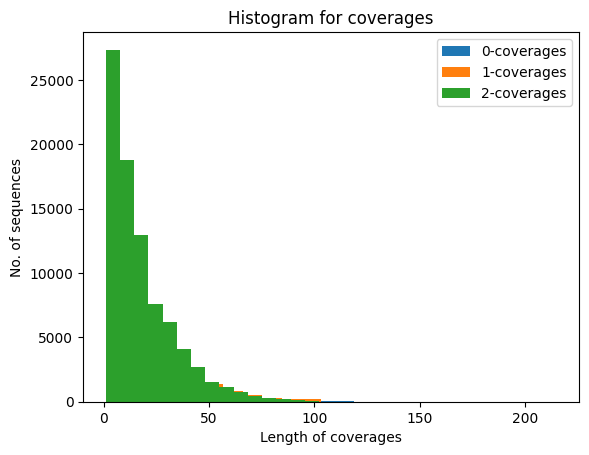

In [ ]:
plt.hist(x11, bins=20,label="0-coverages")
plt.hist(x22, bins=20,label="1-coverages")
plt.hist(x33, bins=20,label="2-coverages")
plt.xlabel("Length of coverages")
plt.ylabel("No. of sequences")
plt.title("Histogram for coverages")
plt.legend()
plt.show()

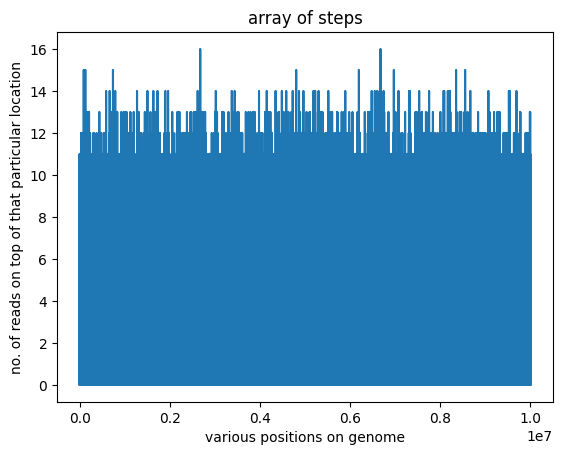

PyObject Text(24.000000000000014, 0.5, 'no. of reads on top of that particular location')

In [ ]:
plt.plot(a)
plt.title("array of steps")
plt.xlabel("various positions on genome")
plt.ylabel("no. of reads on top of that particular location")